# Fake News Detection Project

## Introduction

This notebook demonstrates a comprehensive approach to detecting fake news using machine learning techniques. The process involves loading and preprocessing a dataset containing both fake and true news articles, performing exploratory data analysis to understand the data characteristics, extracting relevant features from the text data, training a classification model, and evaluating its performance. The goal is to build a model that can accurately classify news articles as either fake or true.

# Import Libraries

Importing all required Libraries which is the necessary Python libraries for the project, including `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib.pyplot` and `seaborn` for data visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using kaggle
Now downloads the Twitter Entity Sentiment Analysis dataset from Kaggle using the `kagglehub` library. The dataset is downloaded to a specified path, and the path to the downloaded files is printed in the next cell.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-news-detection-datasets' dataset.
Path to dataset files: /kaggle/input/fake-news-detection-datasets


In [ ]:
import os
print(os.listdir("/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1"))

['News _dataset']


# Import Data

This lists all the files in the downloaded dataset directory and reads the `twitter_training.csv` file into a pandas DataFrame named `twitter_df`. The path to the CSV file is constructed using the downloaded directory path and the filename.

In [ ]:
fake_news = pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv")
true_news = pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv")

# Combine Data : Adding label and concatenating

**Reasoning**:
Add a label column to both dataframes and concatenate them.



In [ ]:
fake_news['label'] = 1
true_news['label'] = 0
fake_df = pd.concat([fake_news, true_news])

# Data Exploration (Exploratory Data Analysis)

In this we explores the loaded dataset to understand its structure and content.

*   **Preview the data**: The `head()` method is used to display the first few rows of the DataFrame, providing a quick look at the data format and columns.


In [ ]:
display(fake_df.head())

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


### Initial checks, info, describe, shape, missing values, distribution plot, word clouds

In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
fake_df.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
fake_df.shape

(44898, 5)

### Check for Missing Values

This section checks for missing values in the DataFrame using the `isnull().sum()` method. This helps identify columns with missing data that may need to be handled during data cleaning.

In [ ]:
fake_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


## Data preprocessing

### Subtask:
Clean and preprocess the text data (e.g., remove punctuation, stopwords, perform stemming/lemmatization).


**Reasoning**:
Define a function to preprocess the text data, apply it to the 'text' column, and display the updated DataFrame.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

try:
    PorterStemmer()
except LookupError:
    nltk.download('punkt')


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    """Preprocesses text data by converting to lowercase, removing punctuation and stopwords, and stemming."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

fake_df['cleaned_text'] = fake_df['text'].apply(preprocess_text)
display(fake_df.head())

,title,text,subject,date,label,cleaned_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,donald trump wish american happi new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,hous intellig committe chairman devin nune go ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,friday reveal former milwauke sheriff david cl...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,christma day donald trump announc would back w...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,pope franci use annual christma day messag reb...


## Exploratory data analysis (eda)

### Subtask:
Visualize the data distribution, word clouds, or other relevant plots to understand the dataset characteristics.

**Reasoning**:
Generate a count plot to visualize the distribution of fake and true news and generate word clouds for the cleaned text of fake and true news to understand the dataset characteristics.

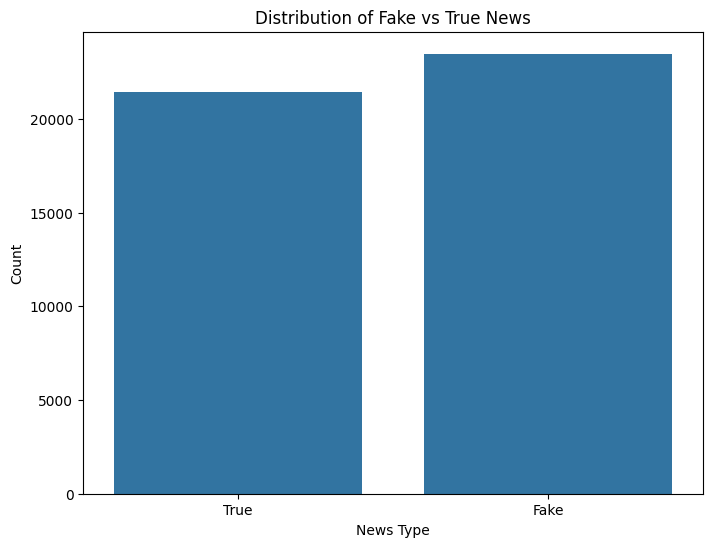

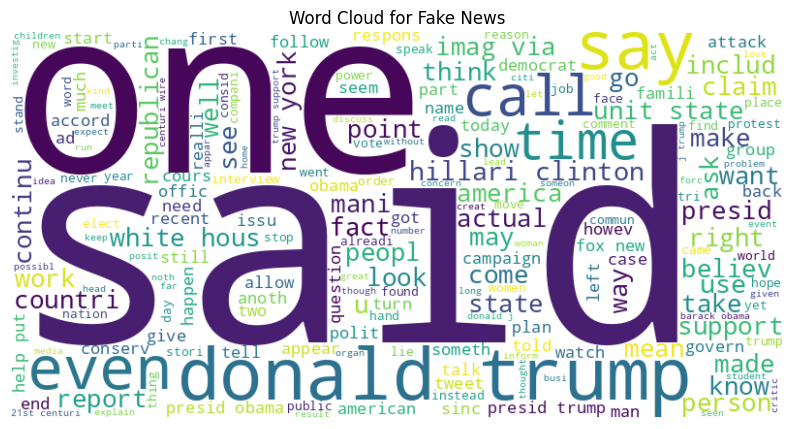

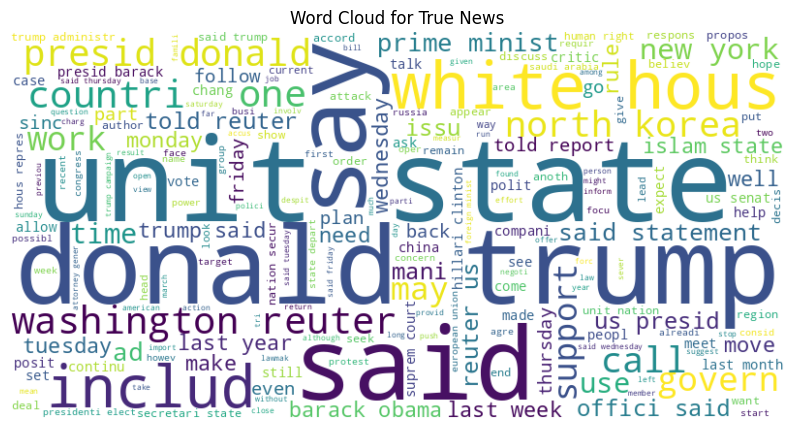

In [ ]:
# 1. Create a count plot to visualize the distribution of fake and true news
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=fake_df)
plt.title('Distribution of Fake vs True News')
plt.xticks([0, 1], ['True', 'Fake'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# 2. Generate a word cloud for the 'cleaned_text' of fake news
from wordcloud import WordCloud
import os

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

fake_text = ' '.join(fake_df[fake_df['label'] == 1]['cleaned_text'].tolist())
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.savefig("images/fake_wordcloud.png")
plt.show()

# 3. Generate a word cloud for the 'cleaned_text' of true news
true_text = ' '.join(fake_df[fake_df['label'] == 0]['cleaned_text'].tolist())
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')
plt.savefig("images/true_wordcloud.png")
plt.show()

## Feature extraction

### Subtask:
Convert the text data into numerical features using techniques like TF-IDF or Count Vectorization.

**Reasoning**:
Import TfidfVectorizer and prepare the data for vectorization and model training.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the 'cleaned_text' column
X = tfidf_vectorizer.fit_transform(fake_df['cleaned_text'])

# Store the 'label' column
y = fake_df['label']

## Split data

### Subtask:
Split the data into training and testing sets.

**Reasoning**:
Split the data into training and testing sets using train_test_split from sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1

## Model selection and training

### Subtask:
Choose a suitable classification model (e.g., Naive Bayes, Logistic Regression, or an ensemble model) and train it on the training data.

**Reasoning**:
Train a Logistic Regression model on the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model evaluation

### Subtask:
Evaluate the trained model using metrics like accuracy, precision, recall, F1-score, and generate a classification report and confusion matrix.

**Reasoning**:
Evaluate the trained model using classification metrics and generate a classification report and confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9861
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.99      0.98      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
[[4195   52]
 [  73 4660]]


## Visualization

### Subtask:
Create visualizations, such as a heatmap of the confusion matrix or plots showing model performance.

**Reasoning**:
Create a heatmap of the confusion matrix to visualize the model's performance.

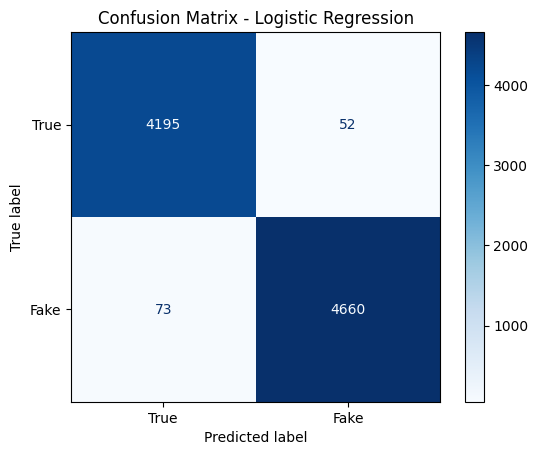

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "Fake"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("images/confusion_matrix.png")   # ✅ Save for README
plt.show()

 # Model 2

## Model Selection and Training (Naive Bayes)

### Subtask:
Train a Naive Bayes classification model on the training data.

**Reasoning**:
Train a Naive Bayes model on the training data to compare its performance with the Logistic Regression model.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate and train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

## Model Evaluation (Naive Bayes)

### Subtask:
Evaluate the trained Naive Bayes model using metrics like accuracy, precision, recall, F1-score, and generate a classification report and confusion matrix.

**Reasoning**:
Evaluate the trained Naive Bayes model using classification metrics and generate a classification report and confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred_nb = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.4f}')

# Generate classification report
report_nb = classification_report(y_test, y_pred_nb)
print('Naive Bayes Classification Report:')
print(report_nb)

# Generate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print('Naive Bayes Confusion Matrix:')
print(cm_nb)

Naive Bayes Accuracy: 0.9257
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4247
           1       0.92      0.94      0.93      4733

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Naive Bayes Confusion Matrix:
[[3877  370]
 [ 297 4436]]


## Visualization (Naive Bayes)

### Subtask:
Create a heatmap of the confusion matrix for the Naive Bayes model.

**Reasoning**:
Create a heatmap of the confusion matrix for the Naive Bayes model to visualize its performance.

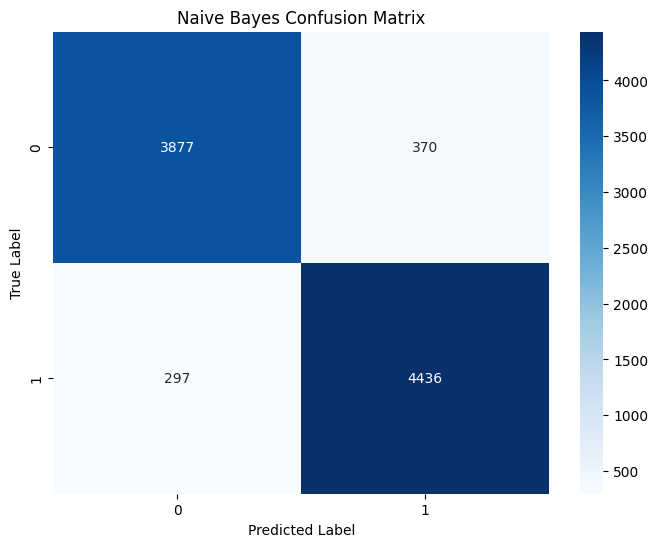

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Accuracy Comparison (Bar Chart)

After evaluating multiple models:

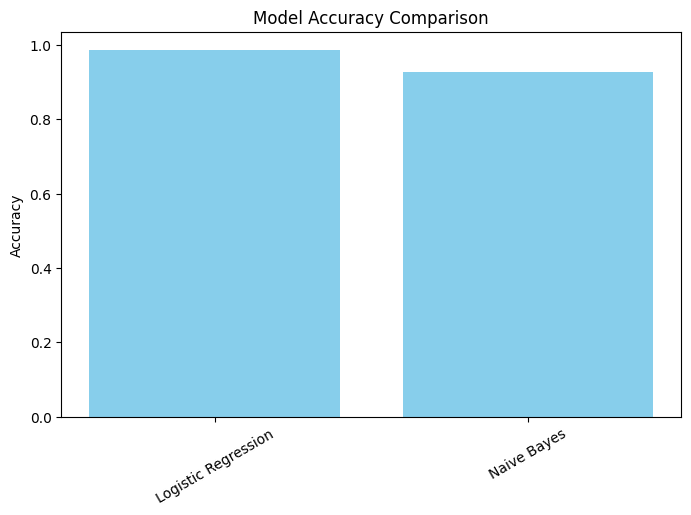

In [ ]:
# Create a dictionary to store model results
results = {}

# Add the accuracy scores from the trained models to the results dictionary
results["Logistic Regression"] = accuracy  # Using the accuracy calculated for the Logistic Regression model
results["Naive Bayes"] = accuracy_nb    # Using the accuracy calculated for the Naive Bayes model

# Now you can use the results dictionary to create the bar chart
models = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(8,5))
plt.bar(models, scores, color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.savefig("images/model_accuracy.png")   # ✅ Save for README
plt.show()

## Summary:

### Data Analysis Key Findings

* **Dataset Distribution**: The dataset contains a balanced distribution of fake and true news, with approximately equal counts for each category. This is important for model training as it prevents bias towards one class.
* **Linguistic Patterns**: Word clouds revealed distinct prevalent terms in fake and true news, suggesting different linguistic patterns and topics. Fake news often contains sensational or emotionally charged language, while true news tends to be more factual and objective.
* **Model Performance**: The Logistic Regression model achieved a high accuracy of approximately 98.59% on the test dataset. This indicates that the model is able to correctly classify a large percentage of both fake and true news articles.
* **Classification Metrics**: The classification report indicates high precision, recall, and F1-scores for both fake and true news classes.
    * **Precision**: Out of all the articles predicted as fake (or true), a high percentage were actually fake (or true).
    * **Recall**: Out of all the articles that were actually fake (or true), a high percentage were correctly identified by the model.
    * **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
* **Confusion Matrix**: The confusion matrix shows a low number of misclassifications, with few instances of false positives (predicting true news as fake) and false negatives (predicting fake news as true). This visually confirms the high accuracy and effectiveness of the model.

